# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [3]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

### Gráficos de comparação - Colunas e barras
Vamos praticar a criação de gráficos de comparação (colunas e barras) que aprendemos até aqui. Para a prática, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no [github do projeto](https://github.com/alura-cursos/dataviz-graficos/blob/master/dados/relatorio_vendas.csv).

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

**Desafio 1**: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

**Desafio 2**: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

> OBS: Para você criar e verificar seus códigos vamos deixar um notebook para resolução deste e dos próximos desafios. Você pode baixá-lo e fazer o upload do notebook no Google Colab ou criar o seu próprio.

### Desafio 1

In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[["data_pedido", "lucro"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_lucro_ano["ano"] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = "data_pedido", axis = 1, inplace=True)

# Agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(["ano"]).aggregate("sum")

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


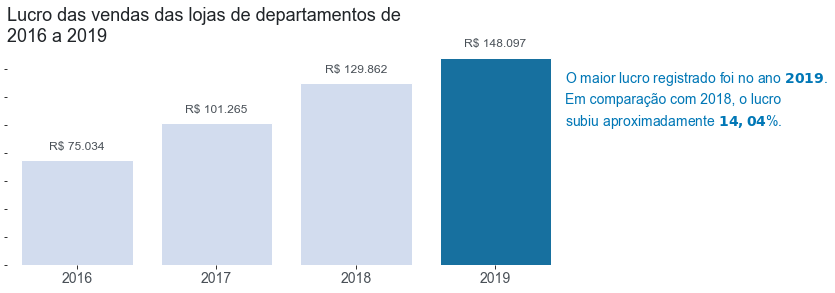

In [3]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style="white")

# Definindo as cores do gráfico
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano,"lucro"] == df_lucro_ano["lucro"].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y="lucro", palette = cores)

# Personalizando o gráfico
ax.set_title("Lucro das vendas das lojas de departamentos de\n2016 a 2019", loc="left", fontsize = 18, color = CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano["lucro"]):
  qtd = f'R$ {valor:,.0f}'.replace(",",".")
  offset = 1e4
  ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = "center", va = "center")

# Anotando uma conclusão no gráfico
ax.text(3.5, 1e5,
         'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
         fontsize=14, linespacing=1.45, color=AZUL2)

# Exibindo o gráfico
plt.show()

### Desafio 2

In [4]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
fat_produto = vendas.copy()
fat_produto = fat_produto[["tipo_produto", "vendas"]]

# Agrupando os dados por tipo_produto, ordenando de maneira decrescente pelas vendas e selecionando os 10 primeiros
fat_produto = fat_produto.groupby(["tipo_produto"]).agg("sum").sort_values("vendas", ascending = False)
top_10 = fat_produto[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [5]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

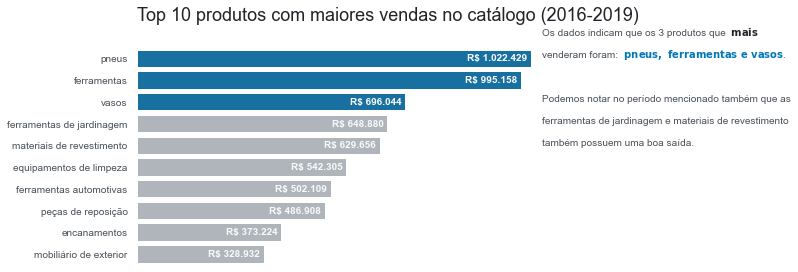

In [6]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style="white")

# Definindo as cores do gráfico: 3 primeiro em azul e restante em cinza 
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gerando o gráfico de barras 
ax = sns.barplot(data = top_10, x="vendas", y = top_10.index, palette = cores)

# Personalizando o gráfico
ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')  
    offset = 1e4  # offset de 10.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Gerando o texto colorido
texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n' 
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

# Exibindo o gráfico
plt.show()

## Aula 02 - Agrupando dados
Vamos praticar a criação de gráficos de comparação representando os valores agrupados por colunas e/ou barras. Para esse desafio, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019

### Desafio 1
Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [7]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido','regiao', 'estado', 'vendas']]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# Selecionando apenas os dados do Centro-Oeste dos anos de 2017 e 2018 e removendo as colunas de data_pedido e região
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels = ["data_pedido","regiao"], axis = 1, inplace = True)

vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [8]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por estado
vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado, 
                         values = vendas_co.vendas, aggfunc = "sum")

vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


In [10]:
import matplotlib
matplotlib.__version__

'3.5.1'

TypeError: __init__() got an unexpected keyword argument 'reverse'

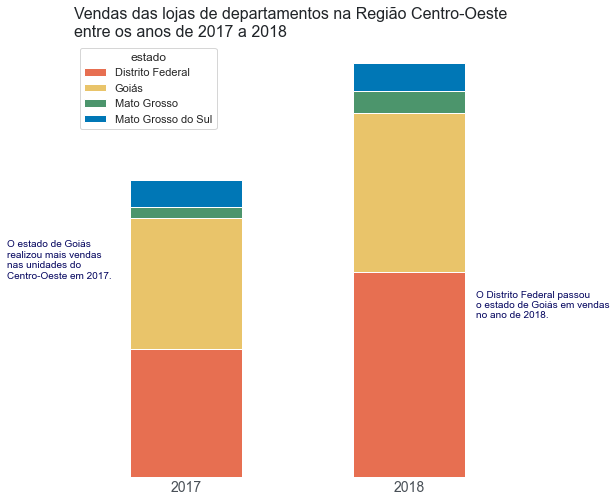

In [9]:
# Definindo as cores do gráfico
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gerando o gráfico de colunas empilhadas 
ax = vendas_co_ano.plot(kind="bar", stacked=True, figsize=(8,8), color = cores)

# Personalizando o gráfico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018', 
             loc='left', fontsize=16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis="both", which ="both", length=0)

# Anotando uma conclusão no gráfico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title= "Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valores 
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()

**Matplotlib Parameters**: Legend - Added in version 3.7.

### Desafio 2
Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [11]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [12]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

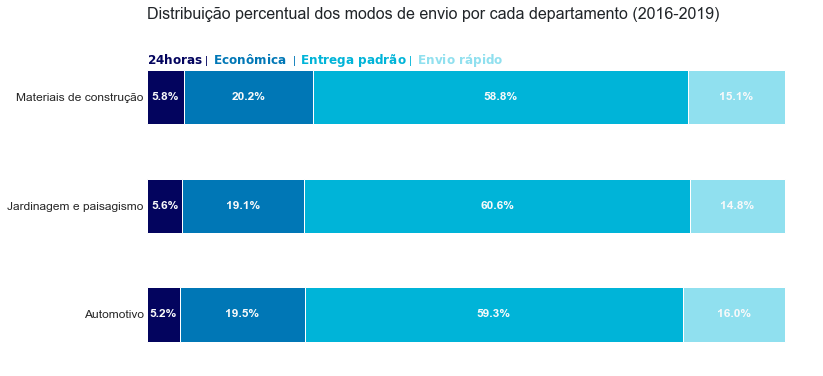

In [13]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas 
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n", 
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()

## Aula 03 - Séries de tempo

### Desafio 1

Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

> Dica: Para agrupar os dados por semestre você pode utilizar a função resample da seguinte forma: `resample(“2Q”, closed = “left”)`

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_estado = vendas.copy()
df_estado = df_estado.query('estado == "Bahia"')[["data_pedido", "vendas"]]

# Agrupando as vendas por final do semestre (2Q)
df_estado.set_index("data_pedido", inplace = True)
df_estado = df_estado.resample("2Q", closed="left").agg("sum")
df_estado = df_estado.reset_index()
df_estado.head()

,data_pedido,vendas
0,2016-06-30,48100.19
1,2016-12-31,84362.51
2,2017-06-30,25747.57
3,2017-12-31,43287.77
4,2018-06-30,47121.96


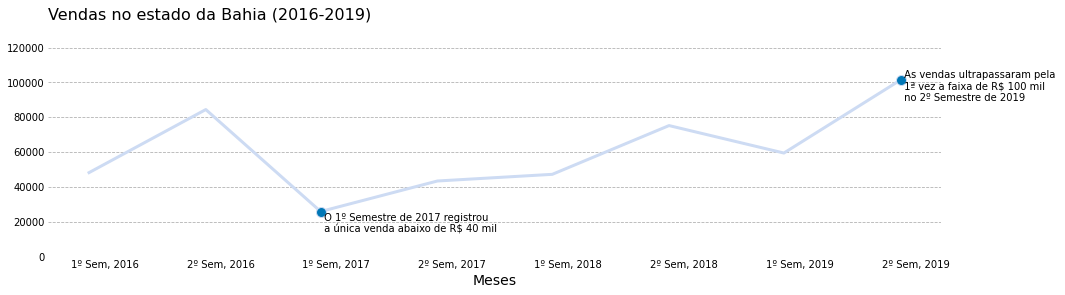

In [4]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Resgatando o valor minimo, maximo das vendas
venda_min = df_estado.vendas.min()
venda_max = df_estado.vendas.max()
valores = df_estado.vendas.values

# Gerando a lista com os pontos a marcar (True apenas para mínimo e máximo)
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# Criando o gráfico de linha das vendas 
ax.plot(df_estado["data_pedido"], df_estado["vendas"], lw = 3, color = AZUL5, marker = "o",
          markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

## Personalizando o gráfico
ax.set_title('Vendas no estado da Bahia (2016-2019)', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 1.25e5)

# Definindo o intervalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017", 
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

# Escrevendo texto nos pontos de destaque
for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e4, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()

### Desafio 2

Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

> Sugestão: Utilize o Plotly para possibilitar ao usuário a escolha entre linhas que deseja visualizar.

In [5]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]

In [6]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estados_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc="sum")

# Agrupando os lucros por ano
df_estados_ne = df_estados_ne.resample('Y').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne

estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [7]:
# Importando a biblioteca
import plotly.express as px

# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estados_ne, x=df_estados_ne.index, y=df_estados_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estados_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

## Aula 04 - Distribuindo dados

Vamos praticar a criação de gráficos de distribuição de dados. Para esse desafio, vamos trabalhar com duas base de dados diferentes: a primeira será um [dataset com as idades de uma amostra da população do município de Cidade Alegre](https://cdn3.gnarususercontent.com.br/3057-data-visualization/Atividades/Aula+04/pop_idade.csv), cidade fictícia que utilizamos em uma de nossas atividades, e a segunda será o dataset dos volumes do amaciante

### Desafio 1

Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dados = pd.read_csv("dados/pop_idade.csv")
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


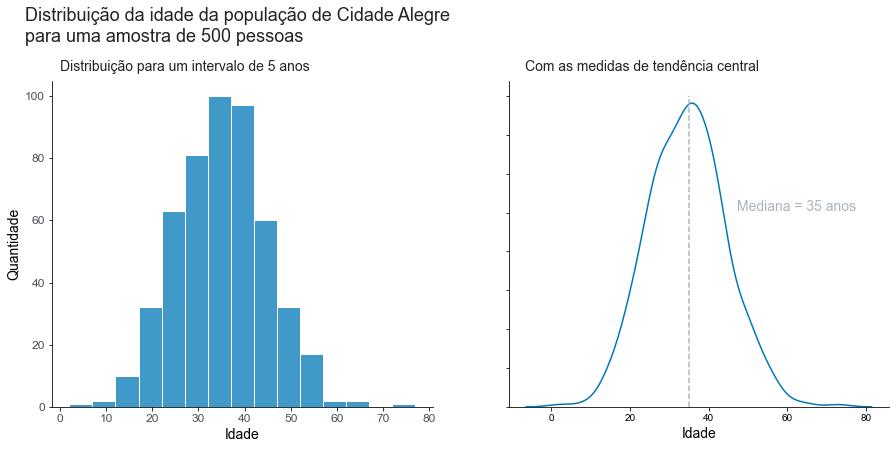

In [10]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas", 
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

# GRÁFICO 1 - Histograma de Colunas

sns.histplot(ax = axs[0], data = dados, x = "idade", binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# GRÁFICO 2 - Histograma de Linhas

sns.kdeplot(ax = axs[1], data = dados, x = "idade", color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x = dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()

### Desafio 2

Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

In [11]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")

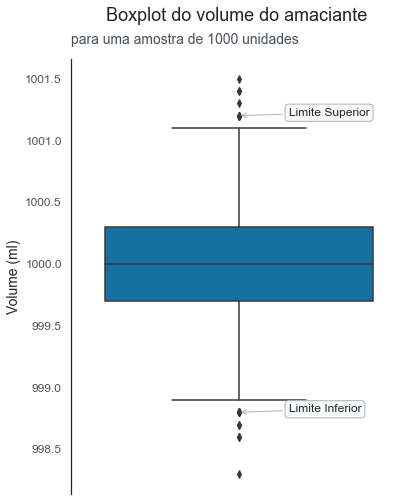

In [12]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = "Volume", orient = "v", color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Calculando o intervalo interquartil(IIQ) e os limites máximos e mínimos
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ

# Adicionando a anotação dos limites superiores e inferiores de um boxplot
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',  # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),                          # caixa de texto
            xytext=(50, 0), textcoords='offset points',                                 # posição do texto
            arrowprops=dict(arrowstyle="->", color=CINZA3))                             # propriedades da seta

ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()

## Aula 05 - Explorando padrões nos dados

Vamos praticar a criação de gráficos de distribuição de dados para duas variáveis, numéricas e/ou categóricas. Para a prática, vamos trabalhar com duas base de dados diferentes: a primeira será um [dataset com as notas de 3 turmas do curso de Data Visualization](https://cdn3.gnarususercontent.com.br/3057-data-visualization/Atividades/Aula+05/notas.csv) da plataforma de cursos de tecnologia fictícia que utilizamos em uma de nossas atividades, e a segunda será o dataset das medidas da caixa de sabão em pó da fábrica de produtos de higiene e limpeza que utilizamos durante essa aula

### Desafio 1

Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notas = pd.read_csv("dados/notas.csv")
notas.head()

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72


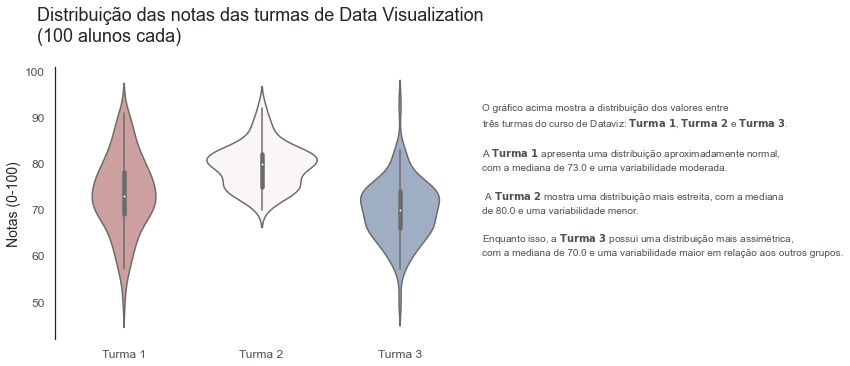

In [15]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style="whitegrid")

# Gerando o violinplot das notas
ax = sns.violinplot(data = notas, x = "Turma", y = "Nota", palette = "vlag_r")

# Personalizando o gráfico
plt.suptitle('Distribuição das notas das turmas de Data Visualization\n(100 alunos cada)', size=18, color=CINZA1, ha = 'left', x = 0.1, y = 1.05)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Criando uma lista com as medianas de cada turma
mediana = []
for i in range(1,4):
  mediana.append(notas.query(f"Turma == 'Turma {i}'").Nota.median())  

# Texto explicativo
ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n' 
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()

### Desafio 2

Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.

In [16]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]

df_b.head()

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)

# Personalizando o gráfico
plt.suptitle('Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)', size=14, color=CINZA1, ha = 'right', x = 0.9, y = 1)
ax.set_xlabel('Comprimento (cm)', fontsize = 12)
ax.set_ylabel('Largura (cm)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de altura desejada
ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize=12, color = CINZA2, ha="left", va = "bottom")
plt.axhline(y = 5 * (1 + pct), color = CINZA4, linestyle='--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize=12, color = CINZA2, ha="left", va = "top")
plt.axhline(y = 5 * (1 - pct), color = CINZA4, linestyle='--')

plt.show()

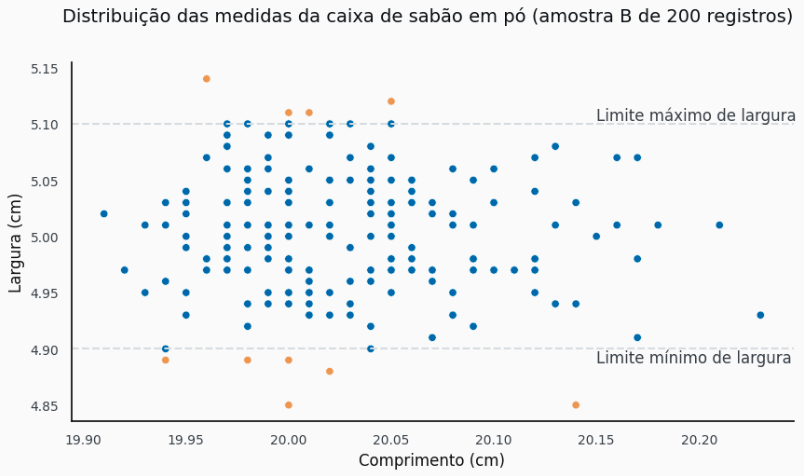